In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/sample/cats_and_dogs_filtered.zip

--2022-06-04 03:47:21--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.139.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/sample/cats_and_dogs_filtered.zip’

/content/sample/cat 100%[===================>]  65.43M   147MB/s    in 0.4s    

2022-06-04 03:47:21 (147 MB/s) - ‘/content/sample/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
local_zip = '/content/sample/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


In [ ]:
len(train_cat_fnames)

1000

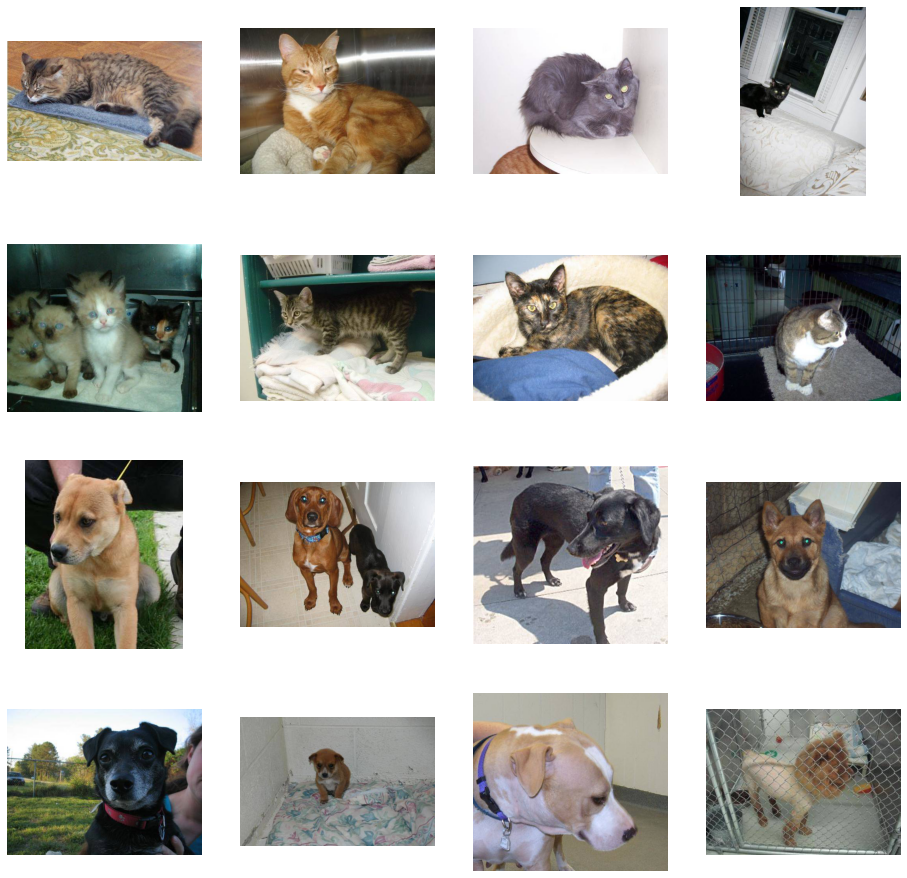

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  img.shape

plt.show()


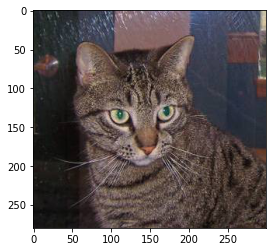

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/cats_and_dogs_filtered/train/cats/cat.1.jpg')
plt.imshow(im)
plt.show()

In [ ]:
im.shape

(280, 300, 3)

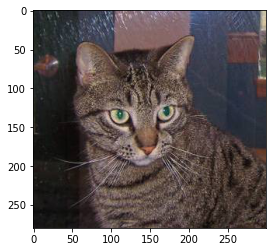

In [ ]:
import matplotlib.pyplot as plt
im1 = plt.imread('/content/cats_and_dogs_filtered/train/dogs/dog.102.jpg')
plt.imshow(im)
plt.show()

In [ ]:
im1.shape

(373, 499, 3)

In [ ]:
im

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

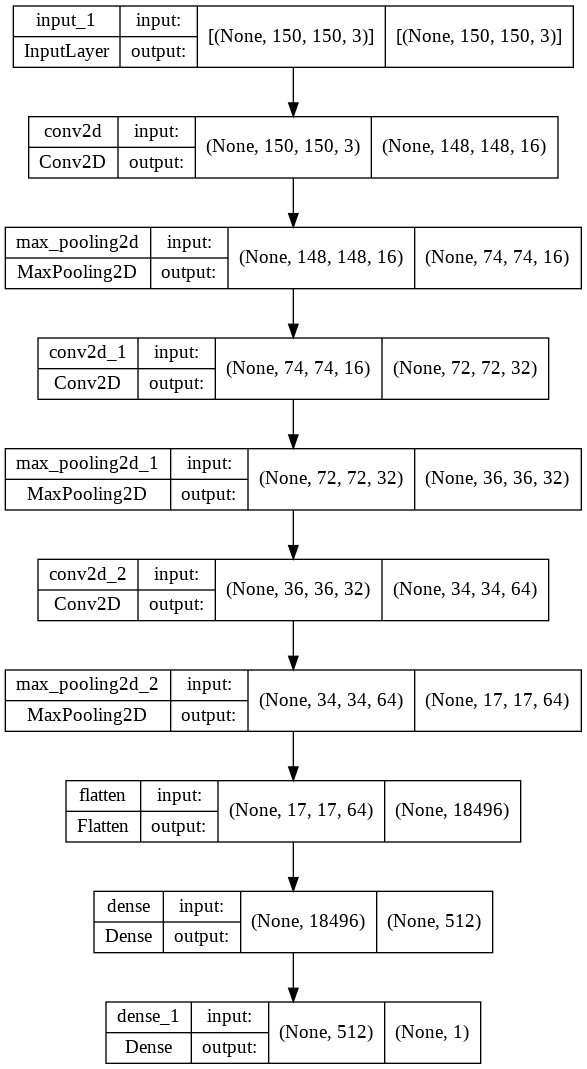

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


######datagen = ImageDataGenerator(
######   featurewise_center=True,
 ######   featurewise_std_normalization=True,
 ###### rotation_range=20,
  ######  width_shift_range=0.2,
 ######   height_shift_range=0.2,
  ######  horizontal_flip=True,
  ######  validation_split=0.2)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


train_generator = train_datagen.flow_from_directory(
    directory=r"./train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
) 

In [ ]:
train_generator[1]

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 9s - loss: 0.0638 - acc: 0.9865 - val_loss: 2.0845 - val_acc: 0.6910 - 9s/epoch - 89ms/step
Epoch 2/50
100/100 - 9s - loss: 0.0515 - acc: 0.9900 - val_loss: 1.9010 - val_acc: 0.7100 - 9s/epoch - 87ms/step
Epoch 3/50
100/100 - 9s - loss: 0.0358 - acc: 0.9930 - val_loss: 1.9156 - val_acc: 0.7040 - 9s/epoch - 88ms/step
Epoch 4/50
100/100 - 9s - loss: 0.0348 - acc: 0.9880 - val_loss: 2.1374 - val_acc: 0.7080 - 9s/epoch - 93ms/step
Epoch 5/50
100/100 - 9s - loss: 0.0364 - acc: 0.9910 - val_loss: 2.0405 - val_acc: 0.7000 - 9s/epoch - 88ms/step
Epoch 6/50
100/100 - 9s - loss: 0.0279 - acc: 0.9920 - val_loss: 2.4238 - val_acc: 0.7100 - 9s/epoch - 88ms/step
Epoch 7/50
100/100 - 9s - loss: 0.0225 - acc: 0.9920 - val_loss: 2.5262 - val_acc: 0.7070 - 9s/epoch - 86ms/step
Epoch 8/50
100/100 - 9s - loss: 0.0492 - acc: 0.9915 - val_loss: 2.5506 - val_acc: 0.7020 - 9s/epoch - 86ms/step
Epoch 9/50
100/100 - 9s - loss: 0.0304 - acc: 0.9920 - val_loss: 2.6992 - val_acc: 0.6880 - 9s/epoch - 87ms

Text(0.5, 1.0, 'Training and validation loss')

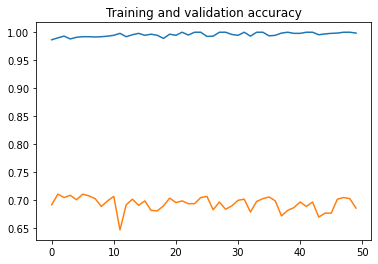

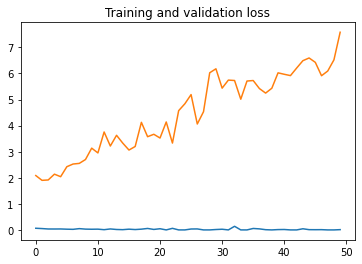

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


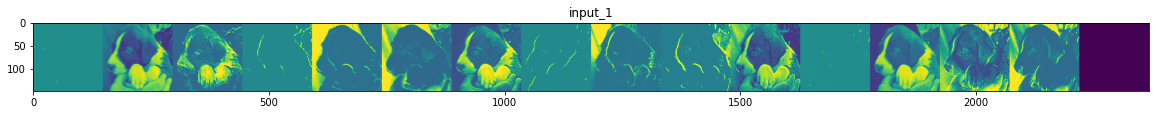

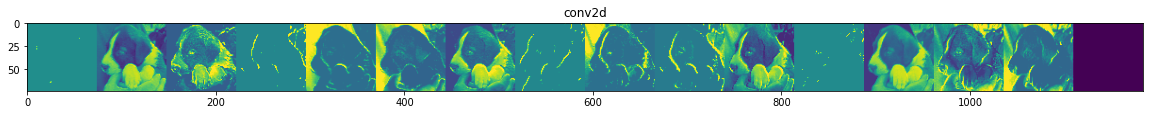

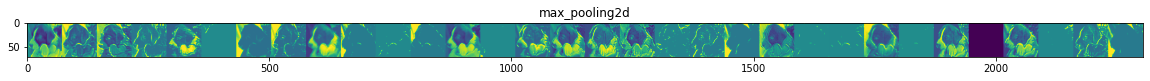

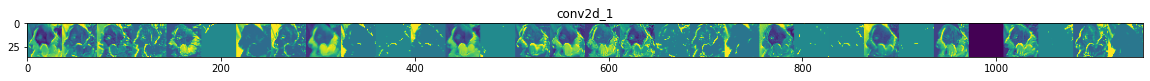

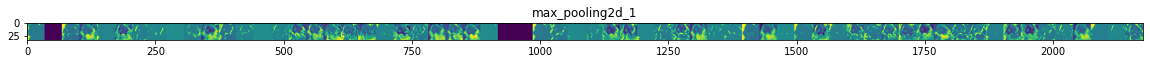

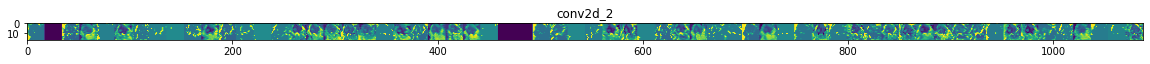

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[0:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

#Improve accuracy using dropout


In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input1 = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x1 = layers.Conv2D(16, 3, activation='relu')(img_input1)
x1 = layers.MaxPooling2D(2)(x1)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x1 = layers.Conv2D(32, 3, activation='relu')(x1)
x1 = layers.MaxPooling2D(2)(x1)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x1 = layers.Conv2D(64, 3, activation='relu')(x1)
x1 = layers.MaxPooling2D(2)(x1)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x1 = layers.Flatten()(x1)

# Create a fully connected layer with ReLU activation and 512 hidden units
x1 = layers.Dense(512, activation='relu')(x1)
x1 = layers.Dropout(0.5)(x1)

# Create output layer with a single node and sigmoid activation
output1 = layers.Dense(1, activation='sigmoid')(x1)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model1 = Model(img_input1, output1)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 10s - loss: 0.7349 - acc: 0.5500 - val_loss: 0.6555 - val_acc: 0.5970 - 10s/epoch - 96ms/step
Epoch 2/50
100/100 - 9s - loss: 0.6417 - acc: 0.6385 - val_loss: 0.6149 - val_acc: 0.6650 - 9s/epoch - 87ms/step
Epoch 3/50
100/100 - 9s - loss: 0.5843 - acc: 0.7195 - val_loss: 0.5969 - val_acc: 0.6860 - 9s/epoch - 92ms/step
Epoch 4/50
100/100 - 9s - loss: 0.4995 - acc: 0.7600 - val_loss: 0.5851 - val_acc: 0.7060 - 9s/epoch - 90ms/step
Epoch 5/50
100/100 - 9s - loss: 0.4466 - acc: 0.8095 - val_loss: 0.5939 - val_acc: 0.7030 - 9s/epoch - 90ms/step
Epoch 6/50
100/100 - 9s - loss: 0.3646 - acc: 0.8350 - val_loss: 0.5752 - val_acc: 0.7450 - 9s/epoch - 90ms/step
Epoch 7/50
100/100 - 9s - loss: 0.2931 - acc: 0.8805 - val_loss: 0.7063 - val_acc: 0.7260 - 9s/epoch - 93ms/step
Epoch 8/50
100/100 - 9s - loss: 0.2449 - acc: 0.8955 - val_loss: 0.8191 - val_acc: 0.7040 - 9s/epoch - 86ms/step
Epoch 9/50
100/100 - 9s - loss: 0.1837 - acc: 0.9315 - val_loss: 0.8823 - val_acc: 0.7190 - 9s/epoch - 86

Text(0.5, 1.0, 'Training and validation loss')

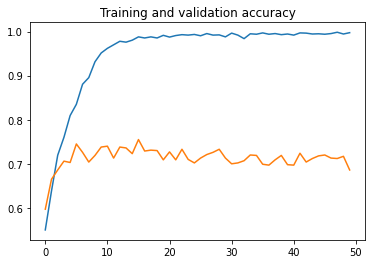

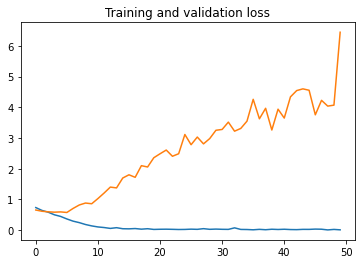

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# data augmentation

In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 19s - loss: 0.7493 - acc: 0.5415 - val_loss: 0.6384 - val_acc: 0.5830 - 19s/epoch - 195ms/step
Epoch 2/30
100/100 - 19s - loss: 0.6616 - acc: 0.6185 - val_loss: 0.6154 - val_acc: 0.6510 - 19s/epoch - 185ms/step
Epoch 3/30
100/100 - 18s - loss: 0.6441 - acc: 0.6360 - val_loss: 0.5861 - val_acc: 0.6850 - 18s/epoch - 177ms/step
Epoch 4/30
100/100 - 18s - loss: 0.6312 - acc: 0.6400 - val_loss: 0.5866 - val_acc: 0.6690 - 18s/epoch - 175ms/step
Epoch 5/30
100/100 - 18s - loss: 0.6272 - acc: 0.6565 - val_loss: 0.5531 - val_acc: 0.7330 - 18s/epoch - 175ms/step
Epoch 6/30
100/100 - 19s - loss: 0.5924 - acc: 0.6890 - val_loss: 0.5507 - val_acc: 0.7090 - 19s/epoch - 186ms/step
Epoch 7/30
100/100 - 18s - loss: 0.6097 - acc: 0.6810 - val_loss: 0.5282 - val_acc: 0.7310 - 18s/epoch - 177ms/step
Epoch 8/30
100/100 - 18s - loss: 0.6001 - acc: 0.6875 - val_loss: 0.5363 - val_acc: 0.7240 - 18s/epoch - 177ms/step
Epoch 9/30
100/100 - 18s - loss: 0.5906 - acc: 0.6975 - val_loss: 0.5558 - val_acc:

Text(0.5, 1.0, 'Training and validation loss')

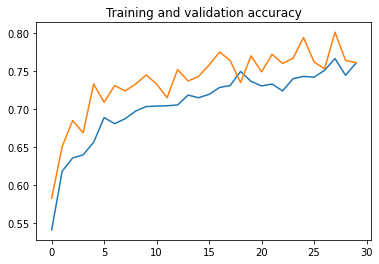

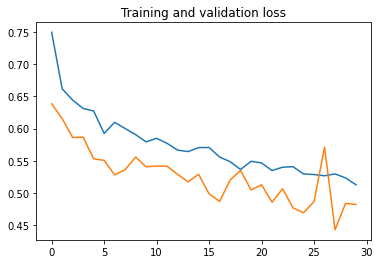

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')